# Regressão 01 - tarefa 01

### 1. Explorando a base de gorjetas

a. Na aula fizemos uma regressão de ```tip``` explicada por ```net_bill```. Carregue os pacotes e a base, crie as variáveis necessárias como na aula, e reproduza esta regressão.

b. Reproduza também o gráfico de dispersão dessas duas variáveis.

In [77]:
#carregando pacotes
import pandas as pd
import seaborn as sns
from seaborn import load_dataset

import matplotlib.pyplot as plt

import numpy as np

import statsmodels.formula.api as smf

In [78]:
#carregando a base
tips = sns.load_dataset("tips")

#criando as colunas tip_pct e net_bill ()
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip']) #(percentual de gorjeta)
tips['net_bill'] = tips['total_bill'] - tips['tip'] #(total da conta - gorjeta)

#visualizando a nossa base de dados
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


Definindo um modelo de regressão em que a variável resposta é gorjeta (tip) e a variável explicativa é o valor da conta (net_bill):

In [79]:
#regressão: váriavel tip explicada pela variável net_bill
reg1=smf.ols('tip~ net_bill', data = tips).fit()

reg1.summary() #resumo da regressão

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Thu, 27 Jul 2023   Prob (F-statistic):           5.02e-23
Time:                        20:56:49   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.000       0.999       1.662
net_bill       0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Podemos ver que tivemos um R-quadrado de 0,333, o que siignifica que a variável net_bill explica 33% da variável tip. 

(0.0, 9.4)

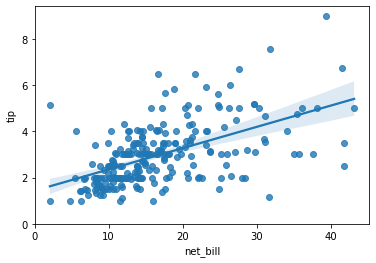

In [80]:
# Gráfico de dispersão tip x net_bill
sns.regplot(y = 'tip', x = 'net_bill', data = tips[tips['tip']<10])

# Opções estéticas para explicitar o (0,0) no gráfico
plt.xlim(left = 0)
plt.ylim(bottom = 0)

Em geral, no gráfico acima podemos ver que os pontos são um pouco dispersos da linha traçada, o que explica termos um R-quadrado de 0,333. 

### 2. Mudança de perspectiva

Agora ajuste um modelo de regressão de ```tip_pct``` por ```net_bill```. Construa o gráfico de dispersão correspondente.

In [81]:
#modelo de regressão tip_pct explicada por net_bill
reg = smf.ols('tip_pct ~ net_bill', data = tips).fit()

reg.summary() #resumo da regressão

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Thu, 27 Jul 2023   Prob (F-statistic):           1.52e-06
Time:                        20:57:13   Log-Likelihood:                 108.00
No. Observations:                 244   AIC:                            -212.0
Df Residuals:                     242   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3053      0.023     13.166      0.000       0.260       0.351
net_bill      -0.0061      0.001     -4.931      0.000      -0.009      -0.004
==============================================================================
Omnibus:                      468.674   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           234437.604
Skew:                          11.104   Prob(JB):                         0.00
Kurtosis:                     153.221   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Nesse modelo de regressão temos um R-quadrado de apenas 9%.

(0.0, 0.505398619388979)

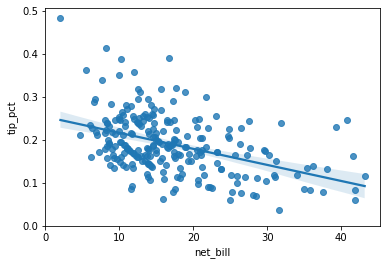

In [82]:
# Gráfico de dispersão tip_pct x net_bill
sns.regplot(y = 'tip_pct', x = 'net_bill', data = tips[tips['tip_pct']<.5])

# Opções estéticas para explicitar o (0,0) no gráfico
plt.xlim(left = 0)
plt.ylim(bottom = 0)


### 3. Comente

Compare os dois gráficos e comente (de forma objetiva e suscinta) a relação entre eles e a diferença do ajuste. Podemos comparar diretamente os $R^2$s?

A diferença no ajuste consiste em que no primeiro gráfico realizamos uma análise do valor da conta com o valor da gorjeta enquanto que na segunda análise analisamos o valor da conta com o percentual da gorjeta. No primeiro gráfico temos uma reta crescente enquanto que no segundo gráfico uma reta decrescente. Entretanto, se nos atentarmos aos pontos dos gráficos percebemos sim semelhanças.
No gráfico 1 temos uma conta de 10 e uma gorjeta pouco maior que 2, o que representa pouco mais de 20% do valor da conta, que é o exibido pelo grafico 2.
No gráfico 1 temos um valor de conta de 40 reais e uma gorjeta pouco maior que 40, que representa um pouco mais de 10%, exatamente o que é representado no gráfico 2.
Portanto, apesar de que no gráfico 1 a gorjeta vai ficando maior, isso se dá porque 10% de 40 é maior que 20% de 10, o que entra em consonância com a análise do gráfico 2, que nos mostra que quanto maior o valor da conta, menor é o percentual de gorjeta sobre esse valor. 
Quanto à comparação dos R-quadrados parece ser uma tarefa difícil, visto que eles são tão diferentes enquanto que a análise de ambos os gráficos parecem ser tão semelhantes. 

### 4. Ajuste do modelo em outra escala

Com o modelo no item 3, obtenha a preditiva do valor da gorjeta:
  1. obtenha o valor predito ```pred``` para ```tip_pct``` (dica, veja o atributo ```reg.fittedvalues```)
  2. obtenha o valor predito para ```tip``` como ```tip_pct * net_bill```
  3. calcule o $R^2$ do modelo para ```tip```
  4. compare esse $R^2$ com o do item 1

In [85]:
#1) criando uma variável que receberá a porcentagem predita de gorjeta
tips['pred_tip_pct']=reg.fittedvalues

In [86]:
#2) criando uma variável que receberá o valor predito da gorjeta de acordo com o percentual predito acima
tips['pred_tip']=tips['pred_tip_pct']*tips['net_bill']

In [84]:
#visualizando tips com as duas colunas criadas
tips

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill,pred_tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98,0.207087
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68,0.251951
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51,0.197684
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37,0.180107
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98,0.176358
...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.256166,23.11,0.163268
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.079428,25.18,0.150546
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.096759,20.67,0.178264
242,17.82,1.75,Male,No,Sat,Dinner,2,0.108899,16.07,0.206534


In [70]:
#mod de regressão pred_tip_pct explicada pela net_bill
reg3 = smf.ols('pred_tip_pct ~ net_bill', data = tips).fit()
reg3.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           pred_tip_pct   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.548e+32
Date:                Thu, 27 Jul 2023   Prob (F-statistic):               0.00
Time:                        10:19:04   Log-Likelihood:                 8892.8
No. Observations:                 244   AIC:                        -1.778e+04
Df Residuals:                     242   BIC:                        -1.777e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3053   5.36e-18   5.69e+16      0.000       0.305       0.305
net_bill      -0.0061   2.88e-19  -2.13e+16      0.000      -0.006      -0.006
==============================================================================
Omnibus:                        9.895   Durbin-Watson:                   0.968
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               10.243
Skew:                          -0.501   Prob(JB):                      0.00597
Kurtosis:                       3.044   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

No modelo acima obtemos um R-quadrado de 1, o que significa que net_bill(valor da conta sem gorjeta) explica perfeitamente a variável pred_tip_pct (percentual predito de gorjeta). Isso ocorre porque a variável pred_tip_pct prevê uma porcentagem de valor para cada conta, ela é representada pela linha no gráfico do exercício número 2. Aqui temos um R-quadrado muito melhor que no item 1, visto que esse tem uma acurácia muito maior. 